In [1]:
import ROOT

Module libc not found.


Welcome to JupyROOT 6.24/07


In [2]:
ROOT.gSystem.Load('./RooMultiVarGaussian2e_cxx.so')

0


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
import matplotlib.pyplot as plt
import numpy as np

from os.path import exists

import read_config_utils as cu

In [4]:
import sys
import time

In [5]:
input_dir = 'output-files-bootstrap-test6-4d-1b'
points_file = 'train-and-true-samples.npy'


weights_file = 'omnifold-output-weights.npy'
#weights_file = 'bootstrap-weights-000.npy'


In [6]:
config_file = '%s/config.txt' % (input_dir)

if not exists(config_file) :
    
    print("\n\n\n ******* Input file does not exist: %s\n\n\n" % config_file )
    sys.exit()
    

In [7]:
ndim = int(cu.get_par( config_file, "ndim"))
print("\n\n Number of feature dimensions: %d\n\n" % ndim)



 Number of feature dimensions: 4




In [8]:
with open( '%s/config-pars.npy' % input_dir, 'rb') as f :
    train_mu = np.load(f, allow_pickle=True )
    train_rho = np.load(f, allow_pickle=True)
    train_sig = np.load(f, allow_pickle=True)    
    true_mu = np.load(f, allow_pickle=True )
    true_rho = np.load(f, allow_pickle=True)
    true_sig = np.load(f, allow_pickle=True)  
    resolution = np.load(f, allow_pickle=True)

In [9]:
with open('%s/%s' % (input_dir, points_file),'rb') as f :
    train_pts = np.load(f)
    train_det_pts = np.load(f)
    true_pts = np.load(f)
    true_det_pts = np.load(f)


In [10]:
with open('%s/%s' % (input_dir, weights_file),'rb') as f :
    sample_weights = np.load(f)

In [11]:

nmcevts = len(train_pts)

print( "train_pts shape:  %s" % str(train_pts.shape))
print( "weights:  %s" % str(sample_weights.shape))

print( "number of MC events: %d" % nmcevts)

train_pts shape:  (4000000, 4)
weights:  (4000000,)
number of MC events: 4000000


In [12]:


true_cov  = np.zeros( shape=(ndim,ndim) )

for i in range(ndim) :
    for j in range(ndim) :
        if j < i : continue
        if i == j :
            true_cov[i][j] = true_sig[i] * true_sig[j]
            print("  %2d, %2d : diagonal  %8.4f" % (i,j, true_cov[i][j]))
        else :
            k = ndim - j - 1
            true_cov[i][j] = true_sig[i] * true_sig[j] * true_rho[i][k]
            true_cov[j][i] = true_cov[i][j]
            print("  %2d, %2d : diagonal  %8.3f * %8.3f * %8.3f = %8.4f" % 
                  (i,j, true_sig[i], true_sig[j], true_rho[i][k], true_cov[i][j]))
            
            
   

   0,  0 : diagonal    0.6400
   0,  1 : diagonal     0.800 *    0.600 *    0.000 =   0.0000
   0,  2 : diagonal     0.800 *    1.000 *   -0.300 =  -0.2400
   0,  3 : diagonal     0.800 *    0.600 *    0.400 =   0.1920
   1,  1 : diagonal    0.3600
   1,  2 : diagonal     0.600 *    1.000 *    0.200 =   0.1200
   1,  3 : diagonal     0.600 *    0.600 *   -0.400 =  -0.1440
   2,  2 : diagonal    1.0000
   2,  3 : diagonal     1.000 *    0.600 *    0.500 =   0.3000
   3,  3 : diagonal    0.3600


## Read in the simple calculation results to set the fit parameter limits.

In [13]:
with open( '%s/simple-calc-results.npy' % input_dir, 'rb') as f :
    sc_ave_mean_val = np.load(f, allow_pickle=True )
    sc_ave_mean_rms = np.load(f, allow_pickle=True)
    sc_ave_cov_val  = np.load(f, allow_pickle=True)    
    sc_ave_cov_rms  = np.load(f, allow_pickle=True )



In [14]:
sc_ave_cov_val

array([[ 0.6415273 , -0.0010646 , -0.24042171,  0.18600525],
       [ 0.        ,  0.35954001,  0.11911643, -0.14381041],
       [ 0.        ,  0.        ,  0.99747429,  0.3007882 ],
       [ 0.        ,  0.        ,  0.        ,  0.36036636]])

In [15]:
print('\n\n')
print('  Simple direct calculation results from the bootstrap samples.\n')

for fi in range(ndim) :
    print('  feature %d  mean:   %8.4f  (true %8.4f) RMS  %8.4f'
         % (fi, sc_ave_mean_val[fi], true_mu[fi], sc_ave_mean_rms[fi]) )
    
print('\n')

for i in range(ndim) :
    for j in range(i,ndim) :
        print('   %d, %d  cov:   %8.4f  (true %8.4f) RMS  %8.4f'
              % ( i, j, sc_ave_cov_val[i][j], true_cov[i,j], sc_ave_cov_rms[i][j]) )

print('\n\n')




  Simple direct calculation results from the bootstrap samples.

  feature 0  mean:     0.8058  (true   0.8000) RMS    0.0070
  feature 1  mean:     0.0940  (true   0.1000) RMS    0.0035
  feature 2  mean:    -0.5904  (true  -0.6000) RMS    0.0107
  feature 3  mean:     0.6958  (true   0.7000) RMS    0.0037


   0, 0  cov:     0.6415  (true   0.6400) RMS    0.0063
   0, 1  cov:    -0.0011  (true   0.0000) RMS    0.0032
   0, 2  cov:    -0.2404  (true  -0.2400) RMS    0.0117
   0, 3  cov:     0.1860  (true   0.1920) RMS    0.0035
   1, 1  cov:     0.3595  (true   0.3600) RMS    0.0035
   1, 2  cov:     0.1191  (true   0.1200) RMS    0.0050
   1, 3  cov:    -0.1438  (true  -0.1440) RMS    0.0018
   2, 2  cov:     0.9975  (true   1.0000) RMS    0.0157
   2, 3  cov:     0.3008  (true   0.3000) RMS    0.0036
   3, 3  cov:     0.3604  (true   0.3600) RMS    0.0020





In [16]:
width_factor_mean = 10
width_factor_cov = 10

###  Do it this way to keep all the RooRealVars in memory in separate objects (different elements in the dictionary).

In [17]:
covdict = {}


for i in range(ndim) :
    for j in range(ndim) :
        if ( j < i ) : continue
        vname = "cov%d%d" % (i,j)
        startval = sc_ave_cov_val[i][j]
        minval = sc_ave_cov_val[i][j] - width_factor_cov * sc_ave_cov_rms[i][j]
        maxval = sc_ave_cov_val[i][j] + width_factor_cov * sc_ave_cov_rms[i][j]
        print(' parameter %s  min %8.4f, max %8.4f' % (vname, minval, maxval))
        if ( i == j ) :
            ######covdict[vname] =  ROOT.RooRealVar( "cov%d%d" % (i,j), "cov%d%d" % (i,j), true_cov[i][j], 0.02, 2.0 ) 
            covdict[vname] =  ROOT.RooRealVar( "cov%d%d" % (i,j), "cov%d%d" % (i,j), startval, minval, maxval )
                                              
        else :
            
            ######covdict[vname] =   ROOT.RooRealVar( "cov%d%d" % (i,j), "cov%d%d" % (i,j), true_cov[i][j], -1.1, 1.1 ) 
            covdict[vname] =   ROOT.RooRealVar( "cov%d%d" % (i,j), "cov%d%d" % (i,j), startval, minval, maxval )
        covdict[vname].Print()    



 parameter cov00  min   0.5781, max   0.7049
 parameter cov01  min  -0.0335, max   0.0314
 parameter cov02  min  -0.3573, max  -0.1235
 parameter cov03  min   0.1513, max   0.2207
 parameter cov11  min   0.3243, max   0.3948
 parameter cov12  min   0.0688, max   0.1694
 parameter cov13  min  -0.1616, max  -0.1260
 parameter cov22  min   0.8406, max   1.1544
 parameter cov23  min   0.2647, max   0.3368
 parameter cov33  min   0.3401, max   0.3806
RooRealVar::cov00 = 0.641527  L(0.578145 - 0.70491) 
RooRealVar::cov01 = -0.0010646  L(-0.0335337 - 0.0314045) 
RooRealVar::cov02 = -0.240422  L(-0.357295 - -0.123548) 
RooRealVar::cov03 = 0.186005  L(0.151347 - 0.220664) 
RooRealVar::cov11 = 0.35954  L(0.324294 - 0.394786) 
RooRealVar::cov12 = 0.119116  L(0.0688481 - 0.169385) 
RooRealVar::cov13 = -0.14381  L(-0.16161 - -0.126011) 
RooRealVar::cov22 = 0.997474  L(0.840588 - 1.15436) 
RooRealVar::cov23 = 0.300788  L(0.264744 - 0.336832) 
RooRealVar::cov33 = 0.360366  L(0.340104 - 0.380629) 


In [18]:
covRAL = ROOT.RooArgList()


for i in range(ndim) :
    for j in range(ndim) :
        if ( j < i ) : continue
        vname = "cov%d%d" % (i,j)
        covRAL.add( covdict[vname] )


In [19]:
ralind = 0
for i in range(ndim) :
    for j in range(ndim) :
        if ( j < i ) : continue
        print( "  %d, %d :  %2d :  %s  %8.3f" % (i,j, ralind, covRAL.at(ralind).GetName(), covRAL.at(ralind).getVal() )) 
        ralind = ralind + 1

  0, 0 :   0 :  cov00     0.642
  0, 1 :   1 :  cov01    -0.001
  0, 2 :   2 :  cov02    -0.240
  0, 3 :   3 :  cov03     0.186
  1, 1 :   4 :  cov11     0.360
  1, 2 :   5 :  cov12     0.119
  1, 3 :   6 :  cov13    -0.144
  2, 2 :   7 :  cov22     0.997
  2, 3 :   8 :  cov23     0.301
  3, 3 :   9 :  cov33     0.360


### The Dict keeps the variables defined in memory

In [20]:
xDict = {}
muDict = {}

xVec = ROOT.RooArgList()
muVec = ROOT.RooArgList()


for i in range(ndim) :
    vname = "x%d" % i
    xDict[vname] = ROOT.RooRealVar( vname, vname, 0., -10., 10. )
    xVec.add( xDict[vname] )
    vname = "mu_x%d" % i
    startval = sc_ave_mean_val[i]
    minval = sc_ave_mean_val[i] - width_factor_mean * sc_ave_mean_rms[i]
    maxval = sc_ave_mean_val[i] + width_factor_mean * sc_ave_mean_rms[i]
    print('  feature %d  mean :  min %8.4f, max %8.4f' % (i, minval, maxval))
    #####muDict[vname] =  ROOT.RooRealVar( vname, vname, true_mu[i], -2., 2. )
    muDict[vname] =  ROOT.RooRealVar( vname, vname, startval, minval, maxval )
    muDict[vname].Print()
    muVec.add( muDict[vname] )
    
weight = ROOT.RooRealVar("weight","weight", 0., 100. )

  feature 0  mean :  min   0.7358, max   0.8758
  feature 1  mean :  min   0.0595, max   0.1285
  feature 2  mean :  min  -0.6975, max  -0.4832
  feature 3  mean :  min   0.6588, max   0.7329
RooRealVar::mu_x0 = 0.805756  L(0.735756 - 0.875756) 
RooRealVar::mu_x1 = 0.093986  L(0.0594663 - 0.128506) 
RooRealVar::mu_x2 = -0.590376  L(-0.697505 - -0.483247) 
RooRealVar::mu_x3 = 0.695847  L(0.658782 - 0.732911) 


In [21]:
rmvg = ROOT.RooMultiVarGaussian2e("rmvg","rmvg", xVec, muVec, covRAL )

  Setting _prevCovVals[0] to 0.641527
  Setting _prevCovVals[1] to -0.001065
  Setting _prevCovVals[2] to -0.240422
  Setting _prevCovVals[3] to 0.186005
  Setting _prevCovVals[4] to 0.359540
  Setting _prevCovVals[5] to 0.119116
  Setting _prevCovVals[6] to -0.143810
  Setting _prevCovVals[7] to 0.997474
  Setting _prevCovVals[8] to 0.300788
  Setting _prevCovVals[9] to 0.360366
 i,j = 0,0
 i,j = 0,1
 i,j = 0,2
 i,j = 0,3
 i,j = 1,1
 i,j = 1,2
 i,j = 1,3
 i,j = 2,2
 i,j = 2,3
 i,j = 3,3

4x4 matrix is as follows

     |      0    |      1    |      2    |      3    |
---------------------------------------------------------
   0 |     0.6415   -0.001065     -0.2404       0.186 
   1 |  -0.001065      0.3595      0.1191     -0.1438 
   2 |    -0.2404      0.1191      0.9975      0.3008 
   3 |      0.186     -0.1438      0.3008      0.3604 


4x4 matrix is as follows

     |      0    |      1    |      2    |      3    |
---------------------------------------------------------
   0 |

In [22]:
xVec.Print("V")

  1) RooRealVar:: x0 = 0
  2) RooRealVar:: x1 = 0
  3) RooRealVar:: x2 = 0
  4) RooRealVar:: x3 = 0


In [23]:
data_test = ROOT.RooDataSet( "data_test", "data_test", ROOT.RooArgSet(xVec, weight) , ROOT.RooFit.WeightVar("weight"))

In [24]:
%%time

for i in range( len(sample_weights) ) :
    if i % (len(sample_weights)/100 ) == 0 : print( " %9d / %9d  (%6.0f)%%" % (i, len(sample_weights), 100*i/len(sample_weights)))
    for j in range( ndim ) :
        xVec[j].setVal( train_pts[i,j] )
    weight.setVal( sample_weights[i])
    data_test.add( ROOT.RooArgSet(xVec, weight), weight.getVal() )

         0 /   4000000  (     0)%
     40000 /   4000000  (     1)%
     80000 /   4000000  (     2)%
    120000 /   4000000  (     3)%
    160000 /   4000000  (     4)%
    200000 /   4000000  (     5)%
    240000 /   4000000  (     6)%
    280000 /   4000000  (     7)%
    320000 /   4000000  (     8)%
    360000 /   4000000  (     9)%
    400000 /   4000000  (    10)%
    440000 /   4000000  (    11)%
    480000 /   4000000  (    12)%
    520000 /   4000000  (    13)%
    560000 /   4000000  (    14)%
    600000 /   4000000  (    15)%
    640000 /   4000000  (    16)%
    680000 /   4000000  (    17)%
    720000 /   4000000  (    18)%
    760000 /   4000000  (    19)%
    800000 /   4000000  (    20)%
    840000 /   4000000  (    21)%
    880000 /   4000000  (    22)%
    920000 /   4000000  (    23)%
    960000 /   4000000  (    24)%
   1000000 /   4000000  (    25)%
   1040000 /   4000000  (    26)%
   1080000 /   4000000  (    27)%
   1120000 /   4000000  (    28)%
   1160000 /  

In [25]:
data_test

In [26]:
data_test.Print("V")

DataStore data_test (data_test)
  Contains 4000000 entries
  Observables: 
    1)  x0 = 0.657444  L(-10 - 10)  "x0"
    2)  x1 = -0.235405  L(-10 - 10)  "x1"
    3)  x2 = -1.03358  L(-10 - 10)  "x2"
    4)  x3 = -0.533827  L(-10 - 10)  "x3"
  Dataset variable "weight" is interpreted as the event weight


In [27]:
data_test.get(0).Print("V")

  1) RooRealVar:: x0 = 1.3158
  2) RooRealVar:: x1 = 0.313693
  3) RooRealVar:: x2 = -0.320132
  4) RooRealVar:: x3 = 0.383565


In [28]:

for i in range(ndim) :
    for j in range(ndim) :
        if ( j < i ) : continue
        if ( i == j ) : continue
        vname = "cov%d%d" % (i,j)
        #covRAL.find(vname).setConstant()

In [29]:
covRAL.Print("V")

  1) RooRealVar:: cov00 = 0.641527
  2) RooRealVar:: cov01 = -0.0010646
  3) RooRealVar:: cov02 = -0.240422
  4) RooRealVar:: cov03 = 0.186005
  5) RooRealVar:: cov11 = 0.35954
  6) RooRealVar:: cov12 = 0.119116
  7) RooRealVar:: cov13 = -0.14381
  8) RooRealVar:: cov22 = 0.997474
  9) RooRealVar:: cov23 = 0.300788
 10) RooRealVar:: cov33 = 0.360366


In [30]:
covRAL.find("cov00").isConstant()

False

In [31]:
covRAL.find("cov01").isConstant()

False

In [32]:
%%time

rfr = rmvg.fitTo( data_test, ROOT.RooFit.SumW2Error(False), ROOT.RooFit.Save(True), ROOT.RooFit.NumCPU(28))



CPU times: user 383 ms, sys: 988 ms, total: 1.37 s
Wall time: 48.7 s
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
  copy constructor, Setting _prevCovVals[0] to 0.641527
  copy constructor, Setting _prevCovVals[1] to -0.001065
  copy constructor, Setting _prevCovVals[2] to -0.240422
  copy constructor, Setting _prevCovVals[3] to 0.186005
  copy constructor, Setting _prevCovVals[4] to 0.359540
  copy constructor, Setting _prevCovVals[5] to 0.119116
  copy constructor, Setting _prevCovVals[6] to -0.143810
  copy constructor, Setting _prevCovVals[7] to 0.997474
  copy constructor, Setting _prevCovVals[8] to 0.300788
  copy constructor, Setting _prevCovVals[9] to 0.360366
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 28 remote server process.
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 cov00     

In [33]:
covRAL.Print("V")

  1) RooRealVar:: cov00 = 0.642795 +/- 0.00144009
  2) RooRealVar:: cov01 = -0.00232783 +/- 0.000765834
  3) RooRealVar:: cov02 = -0.236826 +/- 0.00130455
  4) RooRealVar:: cov03 = 0.189264 +/- 0.000823466
  5) RooRealVar:: cov11 = 0.360192 +/- 0.000805024
  6) RooRealVar:: cov12 = 0.120187 +/- 0.000965352
  7) RooRealVar:: cov13 = -0.144544 +/- 0.000609117
  8) RooRealVar:: cov22 = 0.979911 +/- 0.00219848
  9) RooRealVar:: cov23 = 0.295915 +/- 0.00106283
 10) RooRealVar:: cov33 = 0.359206 +/- 0.000803944


In [34]:
for i in range(ndim) :
    fit_mean = muDict["mu_x%d" % i].getVal()
    fit_mean_err = muDict["mu_x%d" % i].getError()
    print("  %2d :  mu = %8.4f   (true %8.4f) err %8.4f  diff %8.4f   diff/err  %5.2f" % 
          (i, fit_mean, true_mu[i], fit_mean_err, (fit_mean-true_mu[i]), (fit_mean-true_mu[i])/fit_mean_err) )

print("\n")

for i in range(ndim) :
    for j in range(ndim) :
        if ( j < i ) : continue
        fit_cov = covdict["cov%d%d" % (i,j)].getVal()
        fit_cov_err = covdict["cov%d%d" % (i,j)].getError()
        print(" %2d, %2d :  cov  %8.4f  (true %8.4f) err %8.4f  diff %8.4f   diff/err  %5.2f" % 
              (i,j, fit_cov, true_cov[i][j], fit_cov_err, 
               (fit_cov-true_cov[i][j]), (fit_cov-true_cov[i][j])/fit_cov_err)  )

   0 :  mu =   0.8020   (true   0.8000) err   0.0013  diff   0.0020   diff/err   1.61
   1 :  mu =   0.0941   (true   0.1000) err   0.0010  diff  -0.0059   diff/err  -6.16
   2 :  mu =  -0.5808   (true  -0.6000) err   0.0016  diff   0.0192   diff/err  12.21
   3 :  mu =   0.6990   (true   0.7000) err   0.0010  diff  -0.0010   diff/err  -1.04


  0,  0 :  cov    0.6428  (true   0.6400) err   0.0014  diff   0.0028   diff/err   1.94
  0,  1 :  cov   -0.0023  (true   0.0000) err   0.0008  diff  -0.0023   diff/err  -3.04
  0,  2 :  cov   -0.2368  (true  -0.2400) err   0.0013  diff   0.0032   diff/err   2.43
  0,  3 :  cov    0.1893  (true   0.1920) err   0.0008  diff  -0.0027   diff/err  -3.32
  1,  1 :  cov    0.3602  (true   0.3600) err   0.0008  diff   0.0002   diff/err   0.24
  1,  2 :  cov    0.1202  (true   0.1200) err   0.0010  diff   0.0002   diff/err   0.19
  1,  3 :  cov   -0.1445  (true  -0.1440) err   0.0006  diff  -0.0005   diff/err  -0.89
  2,  2 :  cov    0.9799  (true   1.00

In [35]:
def calc_mean_cov( weights, fi1, fi2 ) :

    return_dict = {}
    
    wsum = np.sum( weights )
    
    wx1 = np.sum( weights * train_pts[:,fi1] )
    wx2 = np.sum( weights * train_pts[:,fi2] )
    wx1x2 = np.sum( weights * train_pts[:,fi1] * train_pts[:,fi2] )

    x1 = wx1 / wsum
    x2 = wx2 / wsum

    x1x2 = wx1x2 / wsum
    
    cov12 = x1x2 - x1*x2

    
    return_dict["mean_x1"] = x1
    return_dict["mean_x2"] = x2
    return_dict["cov_x1x2"] = cov12    
    
    if fi1 != fi2 :
        wx1x1 = np.sum( weights * train_pts[:,fi1] * train_pts[:,fi1] )
        wx2x2 = np.sum( weights * train_pts[:,fi2] * train_pts[:,fi2] )
        cov11 = wx1x1 / wsum - x1*x1
        cov22 = wx2x2 / wsum - x2*x2

        rms1 = np.sqrt(cov11)
        rms2 = np.sqrt(cov22)
        rho12 = cov12 / (rms1*rms2)     
    
        return_dict["rho12"] = rho12
        return_dict["rms1"] = rms1
        return_dict["rms2"] = rms2
    else :
        rms1 = np.sqrt(cov12)
        return_dict["rms1"] = rms1
        
    return return_dict



In [36]:
simple_calc_mean = np.zeros( shape=(ndim) )
simple_calc_rms = np.zeros( shape=(ndim) )
simple_calc_cov = np.zeros( shape=(ndim,ndim) )
simple_calc_rho = np.zeros( shape=(ndim,ndim) )

            
for fi1 in range(ndim) :
    for fi2 in range(fi1,ndim) :
        mean_cov = calc_mean_cov( sample_weights, fi1, fi2 )
        simple_calc_cov[fi1,fi2] = mean_cov["cov_x1x2"]
        simple_calc_cov[fi2,fi1] = mean_cov["cov_x1x2"]
        if ( fi1 == fi2 ) :
            print( "  %d %d  :  mean = %8.4f, RMS = %8.4f, cov = %8.4f" % 
                   (fi1, fi2, mean_cov["mean_x1"], mean_cov["rms1"], mean_cov["cov_x1x2"]))
            simple_calc_mean[fi1] = mean_cov["mean_x1"]
            simple_calc_rms[fi1] = mean_cov["rms1"]
        else :
            print( "  %d %d  :  rho = %8.4f,  cov = %8.4f" %
                    (fi1, fi2, mean_cov["rho12"], mean_cov["cov_x1x2"]) )
            simple_calc_rho[fi1,fi2] = mean_cov["rho12"]
            simple_calc_rho[fi2,fi1] = mean_cov["rho12"]
                        


  0 0  :  mean =   0.8054, RMS =   0.8021, cov =   0.6434
  0 1  :  rho =  -0.0052,  cov =  -0.0025
  0 2  :  rho =  -0.3033,  cov =  -0.2420
  0 3  :  rho =   0.3923,  cov =   0.1882
  1 1  :  mean =   0.0939, RMS =   0.5990, cov =   0.3588
  1 2  :  rho =   0.2018,  cov =   0.1202
  1 3  :  rho =  -0.4017,  cov =  -0.1439
  2 2  :  mean =  -0.5884, RMS =   0.9945, cov =   0.9891
  2 3  :  rho =   0.4961,  cov =   0.2951
  3 3  :  mean =   0.6989, RMS =   0.5982, cov =   0.3578


In [37]:
for i in range(ndim) :
    fit_mean = muDict["mu_x%d" % i].getVal()
    fit_mean_err = muDict["mu_x%d" % i].getError()
    print("  %2d :  mu = %8.4f   (simple calc %8.4f) err %8.4f  diff %10.6f   diff/err  %5.2f" % 
          (i, fit_mean, simple_calc_mean[i], fit_mean_err, 
           (fit_mean-simple_calc_mean[i]), (fit_mean-simple_calc_mean[i])/fit_mean_err) )

print("\n")

for i in range(ndim) :
    for j in range(ndim) :
        if ( j < i ) : continue
        fit_cov = covdict["cov%d%d" % (i,j)].getVal()
        fit_cov_err = covdict["cov%d%d" % (i,j)].getError()
        print(" %2d, %2d :  cov  %8.4f  (simple calc %8.4f) err %8.4f  diff %10.6f   diff/err  %5.2f" % 
              (i,j, fit_cov, simple_calc_cov[i][j], fit_cov_err, 
               (fit_cov-simple_calc_cov[i][j]), (fit_cov-simple_calc_cov[i][j])/fit_cov_err)  )

   0 :  mu =   0.8020   (simple calc   0.8054) err   0.0013  diff  -0.003329   diff/err  -2.62
   1 :  mu =   0.0941   (simple calc   0.0939) err   0.0010  diff   0.000197   diff/err   0.21
   2 :  mu =  -0.5808   (simple calc  -0.5884) err   0.0016  diff   0.007581   diff/err   4.83
   3 :  mu =   0.6990   (simple calc   0.6989) err   0.0010  diff   0.000128   diff/err   0.13


  0,  0 :  cov    0.6428  (simple calc   0.6434) err   0.0014  diff  -0.000648   diff/err  -0.45
  0,  1 :  cov   -0.0023  (simple calc  -0.0025) err   0.0008  diff   0.000193   diff/err   0.25
  0,  2 :  cov   -0.2368  (simple calc  -0.2420) err   0.0013  diff   0.005148   diff/err   3.95
  0,  3 :  cov    0.1893  (simple calc   0.1882) err   0.0008  diff   0.001044   diff/err   1.27
  1,  1 :  cov    0.3602  (simple calc   0.3588) err   0.0008  diff   0.001355   diff/err   1.68
  1,  2 :  cov    0.1202  (simple calc   0.1202) err   0.0010  diff  -0.000039   diff/err  -0.04
  1,  3 :  cov   -0.1445  (simple ca

In [38]:
print('\n\n')
print('  weights range:  %g  to %f' % (np.min(sample_weights), np.max(sample_weights)))
for fi in range(ndim) :
    print('  feature %d range:  %f to %f' % (fi, np.min(train_pts[:,fi]), np.max(train_pts[:,fi])))
print('\n\n')




  weights range:  7.99508e-11  to 516.515299
  feature 0 range:  -3.700986 to 6.363016
  feature 1 range:  -3.703591 to 3.748888
  feature 2 range:  -6.281835 to 4.933405
  feature 3 range:  -3.816846 to 4.614540





<function matplotlib.pyplot.show(close=None, block=None)>

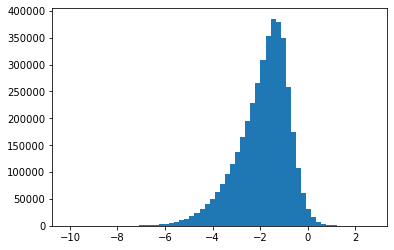

In [39]:
plt.hist(np.log10(sample_weights),bins=60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

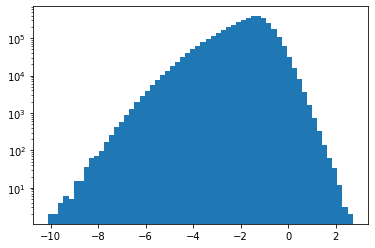

In [40]:
plt.hist(np.log10(sample_weights),bins=60)
ax = plt.gca()
ax.set_yscale('log')
plt.show